<a href="https://colab.research.google.com/github/pthkbs123/SkillTreePython-DeepLearning/blob/main/01.%EB%94%A5%EB%9F%AC%EB%8B%9Dwith%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%9A%B0-basic/ch01_11_CNN%EC%8B%A4%EC%A0%84_%EB%9E%9C%EB%93%9C%EB%A7%88%ED%81%AC%EC%9D%B4%EB%AF%B8%EC%A7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch01.11 CNN실전 - 랜드마크 이미지

* 날짜: 2022-07-19
* 이름: 박태현

## 학습내용
    - 랜드마크 데이터를 이용한 적절한 모델을 구축 및 학습한다.

### 소개

인공지능 기반의 컴퓨터 비전 기술 및 서비스 개발에 활용하기 위해 국내 특성(지리 공간적, 기능적)이 반영된 국내 도심 민간건물, 공공기관, 관광명소, 편의시설 등 국내 도시별 주요 랜드마크 이미지 데이터 구축

### 구축목적
AI 기술 및 응용서비스 개발에 활용가치가 높은 인공지능 학습용 데이터 구축 및 개방, AI응용 서비스 개발
국내 특성(지리 공간적, 기능적)이 반영된 국내 도심 민간건물, 공공기관, 관광명소, 편의시설 등 국내 도시별 주요 랜드마크 이미지 데이터 구축

### AI허브 링크
https://aihub.or.kr/aihubdata/data/view.do?currMenu=115&topMenu=100&aihubDataSe=realm&dataSetSn=56

## 실습
---

#### **데이터로드**
```
! gdown https://drive.google.com/u/0/uc?id=19vsxVITy277RfMTmnY3qE6mH_DOZK7pt&export=download
```

In [2]:
! gdown https://drive.google.com/u/0/uc?id=19vsxVITy277RfMTmnY3qE6mH_DOZK7pt&export=download

Downloading...
From: https://drive.google.com/u/0/uc?id=19vsxVITy277RfMTmnY3qE6mH_DOZK7pt
To: /content/jejudo.zip
100% 4.35G/4.35G [00:19<00:00, 219MB/s]


In [3]:
! unzip /content/jejudo.zip

Archive:  /content/jejudo.zip
   creating: 골드원호텔&스위트/
  inflating: 골드원호텔&스위트/골든원 호텔&스위트_060_41961619.jpg  
  inflating: 골드원호텔&스위트/골든원 호텔&스위트_061_41961623.jpg  
  inflating: 골드원호텔&스위트/골든원 호텔&스위트_062_41961624.jpg  
  inflating: 골드원호텔&스위트/골든원 호텔&스위트_063_41961625.jpg  
  inflating: 골드원호텔&스위트/골든원 호텔&스위트_064_41961628.jpg  
  inflating: 골드원호텔&스위트/골든원 호텔&스위트_066_41961631.jpg  
  inflating: 골드원호텔&스위트/골든원 호텔&스위트_067_41961636.jpg  
  inflating: 골드원호텔&스위트/골든원 호텔&스위트_068_41961637.jpg  
  inflating: 골드원호텔&스위트/골든원 호텔&스위트_069_41961638.jpg  
  inflating: 골드원호텔&스위트/골든원 호텔&스위트_070_41961640.jpg  
  inflating: 골드원호텔&스위트/골든원 호텔&스위트_071_41961641.jpg  
  inflating: 골드원호텔&스위트/골든원 호텔&스위트_073_41961649.jpg  
  inflating: 골드원호텔&스위트/골든원 호텔&스위트_074_41961654.jpg  
  inflating: 골드원호텔&스위트/골든원 호텔&스위트_075_41961655.jpg  
  inflating: 골드원호텔&스위트/골든원 호텔&스위트_076_41961656.jpg  
  inflating: 골드원호텔&스위트/골든원 호텔&스위트_077_41961657.jpg  
  inflating: 골드원호텔&스위트/골든원 호텔&스위트_078_41961659.jpg  
  inflating: 골드원호텔&스위트/골든원 호텔&스위트_079_4196166

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [5]:
# 제주도에 8개 관광지를 맞추는 모델

train_gen = ImageDataGenerator(rescale= 1/255.0, # 0~1 scaling
                               validation_split = 0.2,
                               width_shift_range = 0.25,
                               height_shift_range = 0.25,
                               rotation_range = 180,
                               shear_range = 0.2,
                               zoom_range = 0.2,
                               horizontal_flip = True,
                               vertical_flip = True,
                               brightness_range = [0.6,1.4]
                               )
valid_gen = ImageDataGenerator(rescale= 1/255.0, # 0~1 scaling
                               validation_split = 0.2
                               )

In [7]:
dir_path = '/content/dataset'
IMG_SHAPE = (180,180)
BATCH_SIZE = 8
SEED = 123
# 같은 디렉토리에서 train-valid 나누고 싶다.
train_ds = train_gen.flow_from_directory(dir_path,
                                         target_size = IMG_SHAPE,
                                         batch_size = BATCH_SIZE,
                                         class_mode = 'categorical',
                                         subset = 'training',
                                         seed = SEED
                                         )

valid_ds = valid_gen.flow_from_directory(dir_path,
                                         target_size = IMG_SHAPE,
                                         batch_size = BATCH_SIZE,
                                         class_mode = 'categorical',
                                         subset = 'validation',
                                         seed = SEED
                                         )

Found 1065 images belonging to 8 classes.
Found 263 images belonging to 8 classes.


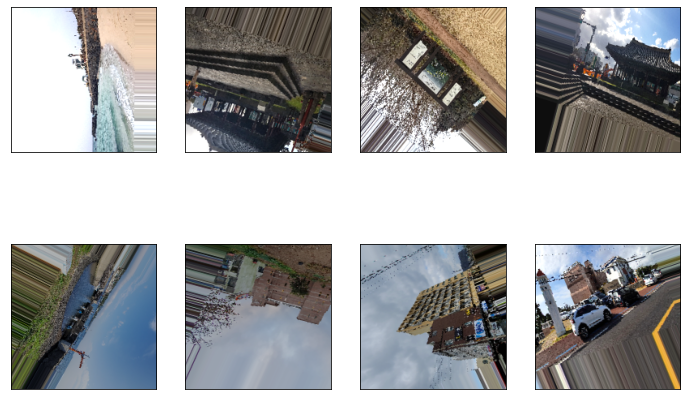

In [8]:
import matplotlib.pyplot as plt

# imgs (batchsize, batchsize)
# labels 원-핫 인코딩이 되어 있다.
plt.figure(figsize = (12,8))
for imgs, labels in train_ds:
  for i in range(BATCH_SIZE):
    plt.subplot(2,4,i+1)
    plt.xticks([]);plt.yticks([])
    plt.imshow(imgs[i])
  break

## 모델학습

In [9]:
base_model = tf.keras.applications.EfficientNetB7(weights='imagenet',
                                                  include_top = False,
                                                  input_shape = IMG_SHAPE + (3,),
                                                  )
base_model.summary()


258088960/258076736 [==============================] - 1s 0us/step
Model: "efficientnetb7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 180, 180, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 180, 180, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (Ze

In [10]:
from tensorflow.keras import layers, models, utils, optimizers

In [11]:
# GlobalAveragePooling2D - Dropout - Dense

def create_model(base_model):
  x = layers.Input(shape = IMG_SHAPE+(3,))
  y = base_model(x)
  y = layers.GlobalAveragePooling2D()(y)
  y = layers.Dropout(0.5)(y)
  y = layers.Dense(8, activation = 'softmax')(y)
  return models.Model(x,y)

model = create_model(base_model)
base_model.trainable = True

model.compile(loss = 'categorical_crossentropy',
              optimizer = optimizers.RMSprop(learning_rate= 0.0002), # 학습률을 작게
              metrics = ['acc']
              )
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 efficientnetb7 (Functional)  (None, 6, 6, 2560)       64097687  
                                                                 
 global_average_pooling2d (G  (None, 2560)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 2560)              0         
                                                                 
 dense (Dense)               (None, 8)                 20488     
                                                                 
Total params: 64,118,175
Trainable params: 63,807,448
Non-trainable params: 310,727
___________________________________________

In [12]:
from tensorflow.keras import callbacks

# 런타임이 끝나면 사라질 수 있으므로 마운트하여 사용
save_path = '/content/drive/MyDrive/딥러닝 프레임워크실무/SkillTreePython-DeepLearning-main/01.딥러닝with텐서플로우-basic/eff_landmark'
tb = callbacks.TensorBoard(log_dir = f'{save_path}/tb_log')
ckp = callbacks.ModelCheckpoint(filepath = f'{save_path}/model.h5',
                                save_best_only = True,
                                monitor = 'val_acc')

TRAIN_STEP = train_ds.n / BATCH_SIZE
VALID_STEP = valid_ds.n / BATCH_SIZE

history = model.fit(train_ds,
                    epochs = 20,
                    validation_data = valid_ds,
                    shuffle = True,
                    callbacks = [tb,ckp],
                    # 계산하기
                    steps_per_epoch = TRAIN_STEP,
                    validation_steps = VALID_STEP,
                    )


Epoch 1/20
133/133 [==============================] - 316s 2s/step - loss: 0.4841 - acc: 0.8629 - val_loss: 2.3245 - val_acc: 0.1217
Epoch 2/20
133/133 [==============================] - 274s 2s/step - loss: 0.1375 - acc: 0.9624 - val_loss: 2.8617 - val_acc: 0.1673
Epoch 3/20
133/133 [==============================] - 242s 2s/step - loss: 0.0685 - acc: 0.9812 - val_loss: 2.7954 - val_acc: 0.5133
Epoch 4/20
133/133 [==============================] - 240s 2s/step - loss: 0.0869 - acc: 0.9775 - val_loss: 1.6974 - val_acc: 0.7110
Epoch 5/20
133/133 [==============================] - 230s 2s/step - loss: 0.0451 - acc: 0.9934 - val_loss: 0.7659 - val_acc: 0.7110
Epoch 6/20
133/133 [==============================] - 229s 2s/step - loss: 0.0633 - acc: 0.9793 - val_loss: 0.9839 - val_acc: 0.6958
Epoch 7/20
133/133 [==============================] - 228s 2s/step - loss: 0.0276 - acc: 0.9944 - val_loss: 1.6784 - val_acc: 0.3802
Epoch 8/20
133/133 [==============================] - 236s 2s/step - 

KeyboardInterrupt: ignored

## 추론

In [13]:
my_model = models.load_model('/content/drive/MyDrive/딥러닝 프레임워크실무/SkillTreePython-DeepLearning-main/01.딥러닝with텐서플로우-basic/eff_landmark/model.h5')
my_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 efficientnetb7 (Functional)  (None, 6, 6, 2560)       64097687  
                                                                 
 global_average_pooling2d (G  (None, 2560)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 2560)              0         
                                                                 
 dense (Dense)               (None, 8)                 20488     
                                                                 
Total params: 64,118,175
Trainable params: 63,807,448
Non-trainable params: 310,727
___________________________________________

In [14]:
my_model.evaluate(valid_ds)

33/33 [==============================] - 45s 1s/step - loss: 0.0014 - acc: 1.0000


[0.001449134899303317, 1.0]

In [15]:
class_dict = valid_ds.class_indices
class_dict = {value : key for key, value in class_dict.items()}
class_dict

{0: '골드원호텔&스위트',
 1: '골든튤립제주성산호텔',
 2: '공천포구',
 3: '곽지과물해변',
 4: '곽지해수욕장',
 5: '관덕정',
 6: '교래 삼다수마을',
 7: '교래자연휴양림'}

(8, 180, 180, 3) (8, 8) (8, 8)
[정답!] "골드원호텔&스위트" 을 "골드원호텔&스위트" 라고 99.99% 확률로 예측하였습니다. 


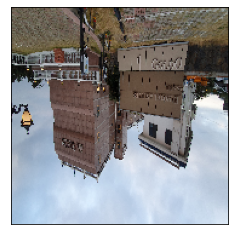

[정답!] "곽지해수욕장" 을 "곽지해수욕장" 라고 100.00% 확률로 예측하였습니다. 


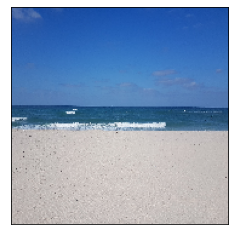

[정답!] "공천포구" 을 "공천포구" 라고 99.96% 확률로 예측하였습니다. 


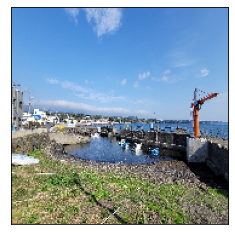

[정답!] "곽지과물해변" 을 "곽지과물해변" 라고 99.95% 확률로 예측하였습니다. 


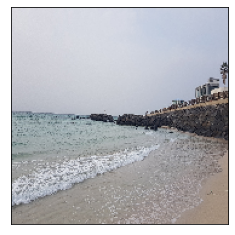

[정답!] "교래 삼다수마을" 을 "교래 삼다수마을" 라고 100.00% 확률로 예측하였습니다. 


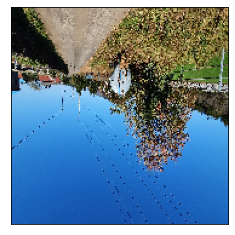

[정답!] "교래자연휴양림" 을 "교래자연휴양림" 라고 100.00% 확률로 예측하였습니다. 


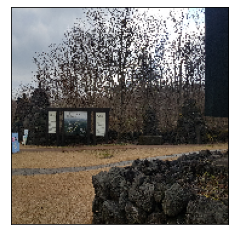

[정답!] "골든튤립제주성산호텔" 을 "골든튤립제주성산호텔" 라고 100.00% 확률로 예측하였습니다. 


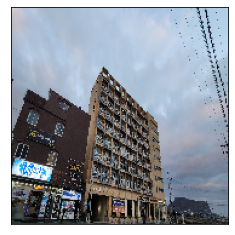

[정답!] "곽지해수욕장" 을 "곽지해수욕장" 라고 100.00% 확률로 예측하였습니다. 


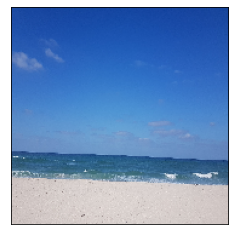

In [18]:
import matplotlib.pyplot as plt
import numpy as np

for imgs, labels in valid_ds :
  preds = my_model.predict(imgs)
  print(imgs.shape, labels.shape, preds.shape)
  for i in range(BATCH_SIZE):
    label = np.argmax(labels[i])
    pred = np.argmax(preds[i])
    if label == pred : result = '정답!'
    else : result = '오답!'
    print(f'[{result}] "{class_dict[label]}" 을 "{class_dict[pred]}" 라고 {preds[i][pred]*100:.2f}% 확률로 예측하였습니다. ')
    plt.xticks([]);plt.yticks([])
    plt.imshow(imgs[i])
    plt.show()
  break